In [1]:
import sys
sys.path.insert(0, '../')
import torch
from qhdopt import QHD

/Users/samuelkushnir/miniconda3/envs/QHDOPT-dev/lib/python3.9/site-packages/qutip/__init__.py:65: UserWarning: The new version of Cython, (>= 3.0.0) is not supported.
  warnings.warn(


In [2]:
from sympy import symbols
x, y = symbols('x y')
functions = [(-x**2 + x*y - 0.5 * y ** 2 + 3. / 4 * x - 1. / 4 * y, [x, y])]

In [3]:
def calc_success_prob(best, samples, f):
    number_success = 0
    for sample in samples:
        if abs(f(sample) - best) < tol:
            number_success +=1
    return number_success / len(samples)

def generate_classical_samples(f, dimension):
    samples = [torch.rand(dimension, requires_grad=True) for _ in range(100)]
    post_model_samples = torch.rand(100, dimension)
    current_best = float('inf')

    for k in range(len(samples)):
        x0 = samples[k]
        optimizer = torch.optim.Adam([x0], lr=0.1)  # lr is the learning rate

        # Optimization loop
        for step in range(100):
            optimizer.zero_grad()  # Zero gradients
            loss = f(x0)  # Compute the function value
            loss.backward()  # Compute gradients
            optimizer.step()
            with torch.no_grad():
                x0.data = torch.clamp(x0.data, min=0,
                                      max=1)  # ensure we satisfy box constraints

        result = x0.detach()
        post_model_samples[k] = result
        if f(result) < current_best:
            current_best = f(result)
    return post_model_samples, current_best

def run_opt(func, syms):
    model_qhd = QHD(func, syms, resolution, api_key, backend, embedding_scheme, anneal_schedule, numruns, penalty_coefficient=penalty_coefficient)
    current_best_qhd = model_qhd.optimize(print_summary=False)
    adam_opt_samples, adam_opt_best = generate_classical_samples(model_qhd.f_eval, model_qhd.dimension)
    success_prop_qhd = calc_success_prob(min(adam_opt_best, current_best_qhd), model_qhd.post_processed_samples, model_qhd.f_eval)
    success_prop_adam = calc_success_prob(min(adam_opt_best, current_best_qhd), adam_opt_samples, model_qhd.f_eval)
    return success_prop_qhd, success_prop_adam

In [35]:
backend = "qutip"
embedding_scheme = "onehot"
api_key = "S2IM2NnfFm96KJAH9h4ZkYReMv5AbJ4E"
resolution = 6
penalty = 50
discretization = 40
gamma = 30
tol = 1e-3

func, syms = functions[0]
model_qhd = QHD(func, syms, resolution, api_key, backend, embedding_scheme,gamma=gamma)
current_best_qhd = model_qhd.optimize(verbose = 0)
adam_opt_samples, adam_opt_best = generate_classical_samples(model_qhd.f_eval, model_qhd.dimension)
success_prop_qhd = calc_success_prob(min(adam_opt_best, current_best_qhd), model_qhd.post_processed_samples, model_qhd.f_eval)
success_prop_adam = calc_success_prob(min(adam_opt_best, current_best_qhd), adam_opt_samples, model_qhd.f_eval)

Compiled.
Solved.
* Candidate solution
Minimizer: [0.16666667 1.        ]
Minimum: -0.48611111111111116

* Runtime breakdown
SimuQ compilation: 0.262 s
QuTiP backend: 1.760 s
Decoding time: 0.013 s
* Post-processing: Yes
Post-processing time: 0.281 s
Total time: 2.316 s


In [36]:
#success_prop_qhd, success_prop_adam = run_opt(function, free_vars)
print("QHD: ", success_prop_qhd)
print("Adam: ", success_prop_adam)
print("QHD - Adam: ", success_prop_qhd - success_prop_adam)

QHD:  0.5833333333333334
Adam:  0.66
QHD - Adam:  -0.07666666666666666


In [37]:
model_qhd.qhd_sample_prob

array([2.24154311e-03, 3.19742430e-03, 5.97269629e-04, 4.14180770e-02,
       1.05766342e-01, 4.23095444e-01, 4.07014643e-04, 7.48853459e-04,
       8.63241364e-03, 7.29406165e-03, 5.76187341e-02, 1.54344405e-02,
       1.13819785e-04, 5.27927317e-05, 4.17893204e-03, 1.43784584e-02,
       1.26527026e-03, 7.22063783e-03, 8.88463671e-04, 3.91474877e-04,
       1.31489434e-03, 9.06833566e-03, 1.06567039e-02, 8.57660081e-03,
       1.96241069e-02, 1.87799795e-03, 3.35796129e-03, 1.54817326e-02,
       1.92842916e-02, 2.04553579e-02, 1.26038528e-01, 2.54843169e-02,
       1.53072741e-03, 1.15665612e-02, 1.37835993e-02, 1.69568165e-02])

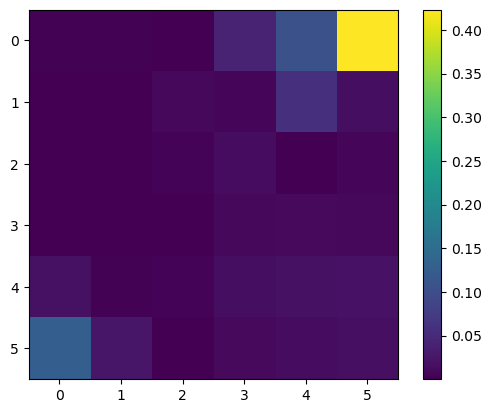

In [38]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(np.reshape(model_qhd.qhd_sample_prob, [model_qhd.r, model_qhd.r]))
plt.colorbar()

In [39]:
sum(model_qhd.qhd_sample_prob)

0.9999999999999997

In [14]:
model_qhd.qhd_samples

array([[0.16666667, 0.16666667],
       [0.16666667, 0.33333333],
       [0.16666667, 0.5       ],
       [0.16666667, 0.66666667],
       [0.16666667, 0.83333333],
       [0.16666667, 1.        ],
       [0.33333333, 0.16666667],
       [0.33333333, 0.33333333],
       [0.33333333, 0.5       ],
       [0.33333333, 0.66666667],
       [0.33333333, 0.83333333],
       [0.33333333, 1.        ],
       [0.5       , 0.16666667],
       [0.5       , 0.33333333],
       [0.5       , 0.5       ],
       [0.5       , 0.66666667],
       [0.5       , 0.83333333],
       [0.5       , 1.        ],
       [0.66666667, 0.16666667],
       [0.66666667, 0.33333333],
       [0.66666667, 0.5       ],
       [0.66666667, 0.66666667],
       [0.66666667, 0.83333333],
       [0.66666667, 1.        ],
       [0.83333333, 0.16666667],
       [0.83333333, 0.33333333],
       [0.83333333, 0.5       ],
       [0.83333333, 0.66666667],
       [0.83333333, 0.83333333],
       [0.83333333, 1.        ],
       [1.

In [16]:
for res in model_qhd.raw_result:
    print(res)

000000000000
000000000001
000000000010
000000000011
000000000100
000000000101
000000000110
000000000111
000000001000
000000001001
000000001010
000000001011
000000001100
000000001101
000000001110
000000001111
000000010000
000000010001
000000010010
000000010011
000000010100
000000010101
000000010110
000000010111
000000011000
000000011001
000000011010
000000011011
000000011100
000000011101
000000011110
000000011111
000000100000
000000100001
000000100010
000000100011
000000100100
000000100101
000000100110
000000100111
000000101000
000000101001
000000101010
000000101011
000000101100
000000101101
000000101110
000000101111
000000110000
000000110001
000000110010
000000110011
000000110100
000000110101
000000110110
000000110111
000000111000
000000111001
000000111010
000000111011
000000111100
000000111101
000000111110
000000111111
000001000000
000001000001
000001000010
000001000011
000001000100
000001000101
000001000110
000001000111
000001001000
000001001001
000001001010
000001001011
000001001100